### SEV -> S = Severed, I = Intact
### GRZ H = High leaves?
### GRZ N/L = Less/No leaves? 

### Care about the test sides' recovery

### Does the plant recover better from low/no leaves when it is not severed vs when it is severed?

In [7]:
library(readr)

plants = read_csv('grz_revised.csv')
# Only care about the test side
plants = subset(plants, SIDE == "T")
head(plants)
attach(plants)

Parsed with column specification:
cols(
  GRZ = col_character(),
  SEV = col_character(),
  SIDE = col_character(),
  ID = col_integer(),
  L = col_integer(),
  I = col_integer(),
  NR = col_integer(),
  NB = col_integer(),
  NT = col_integer(),
  MRL = col_double(),
  B = col_integer(),
  BB = col_integer(),
  TB = col_integer(),
  LB = col_double(),
  IB = col_double(),
  MRB = col_double(),
  BrB = col_double(),
  LA = col_double(),
  Bio = col_double()
)


GRZ,SEV,SIDE,ID,L,I,NR,NB,NT,MRL,B,BB,TB,LB,IB,MRB,BrB,LA,Bio
N,S,T,1,44,29,20,57,77,46,15,4,19,0.978,1.591,0.823,0.739,14.00000,4.131
L,S,T,2,42,33,18,100,118,43,12,9,21,0.276,0.324,0.268,0.640,10.15000,1.508
H,I,T,3,57,16,21,153,174,54,14,12,26,0.366,0.048,0.387,0.742,10.75000,1.543
L,I,T,4,26,18,20,48,68,39,9,1,10,0.267,0.232,0.470,0.259,11.46667,1.228
H,I,T,5,59,13,22,142,164,64,16,14,30,0.352,0.065,0.529,0.760,10.70000,1.706
N,S,T,6,23,23,18,22,40,57,11,0,11,0.843,1.431,0.748,0.352,16.77500,3.374


The following objects are masked from plants (pos = 3):

    B, BB, Bio, BrB, GRZ, I, IB, ID, L, LA, LB, MRB, MRL, NB, NR, NT,
    SEV, SIDE, TB



### Bigger plant has high biomass (Bio) -> response

            Df Sum Sq Mean Sq F value Pr(>F)    
GRZ          2 253.76  126.88   83.04 <2e-16 ***
SEV          1   6.46    6.46    4.23 0.0446 *  
GRZ:SEV      2   0.77    0.38    0.25 0.7793    
Residuals   54  82.51    1.53                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

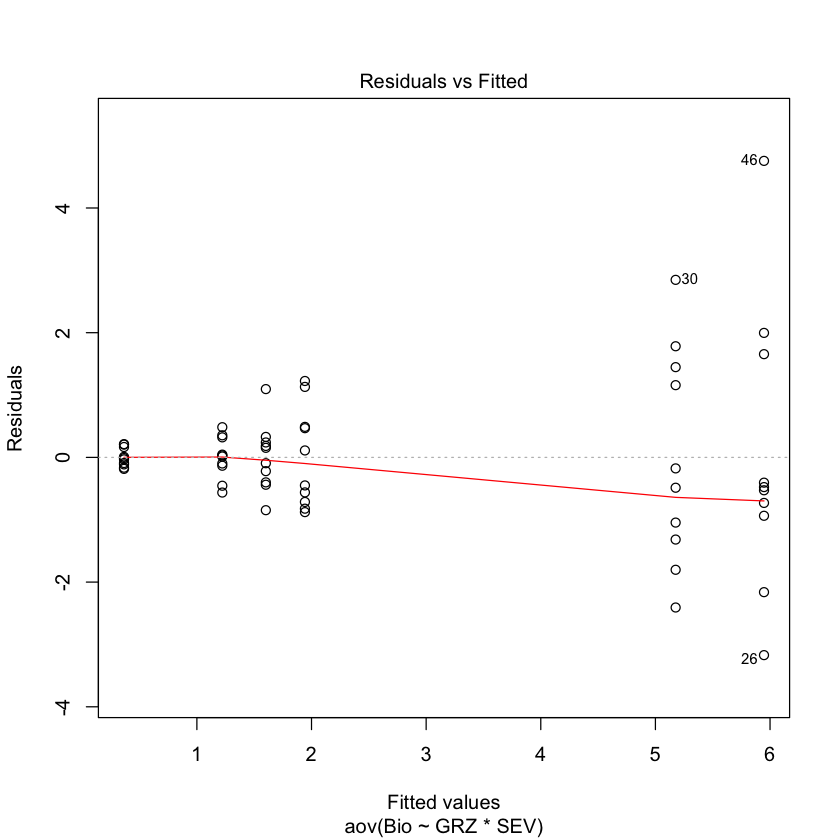

hat values (leverages) are all = 0.1
 and there are no factor predictors; no plot no. 5


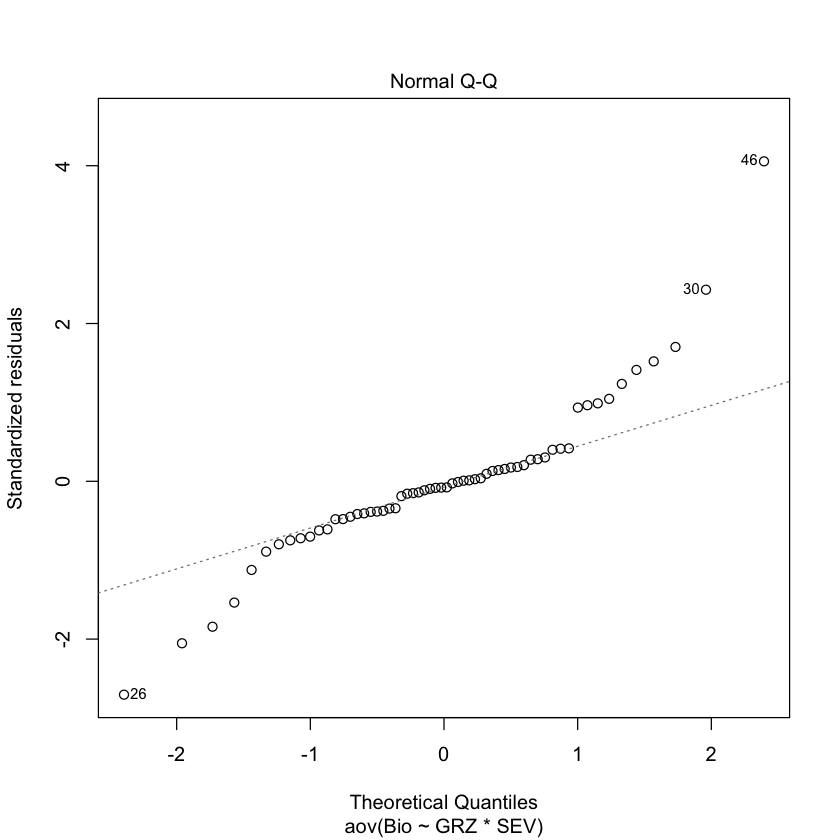

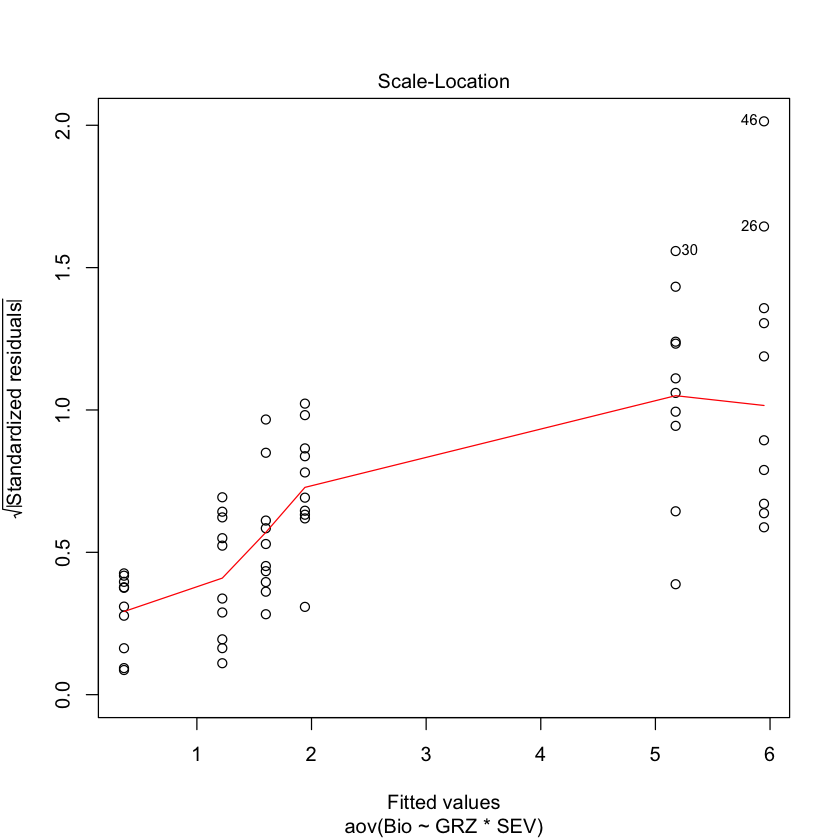

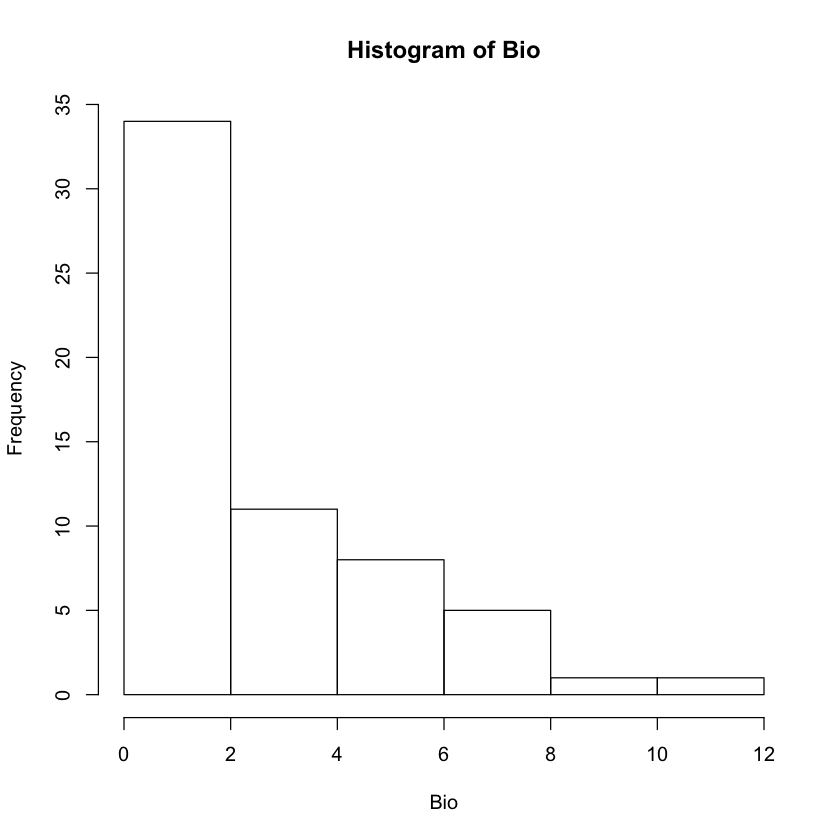

In [8]:
# Two way anova on Bio with Sev and Grz interaction
plant.aov = aov(Bio ~ GRZ*SEV)
summary(plant.aov)

### Conclusion: No interaction between the factors

plot(plant.aov)
# The histogram suggests that a log transformation of the response variable is a good idea
hist(Bio)

### We have nonnormality and heteroscedastic. The histogram suggests that a log transformation of the response variable is a good idea

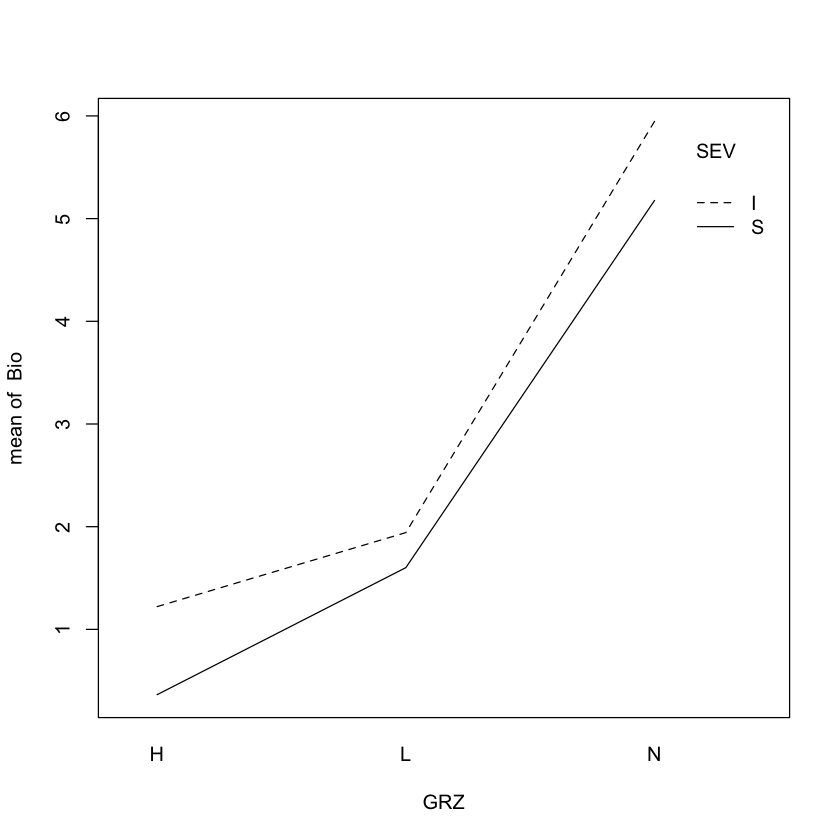

In [9]:
interaction.plot(GRZ, SEV, Bio)

### We will try a log transformation of the response variable to achieve normality and homoscedasticity 

            Df Sum Sq Mean Sq F value   Pr(>F)    
GRZ          2  44.99  22.495  163.23  < 2e-16 ***
SEV          1   3.97   3.973   28.83 1.71e-06 ***
GRZ:SEV      2   4.05   2.023   14.68 8.12e-06 ***
Residuals   54   7.44   0.138                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

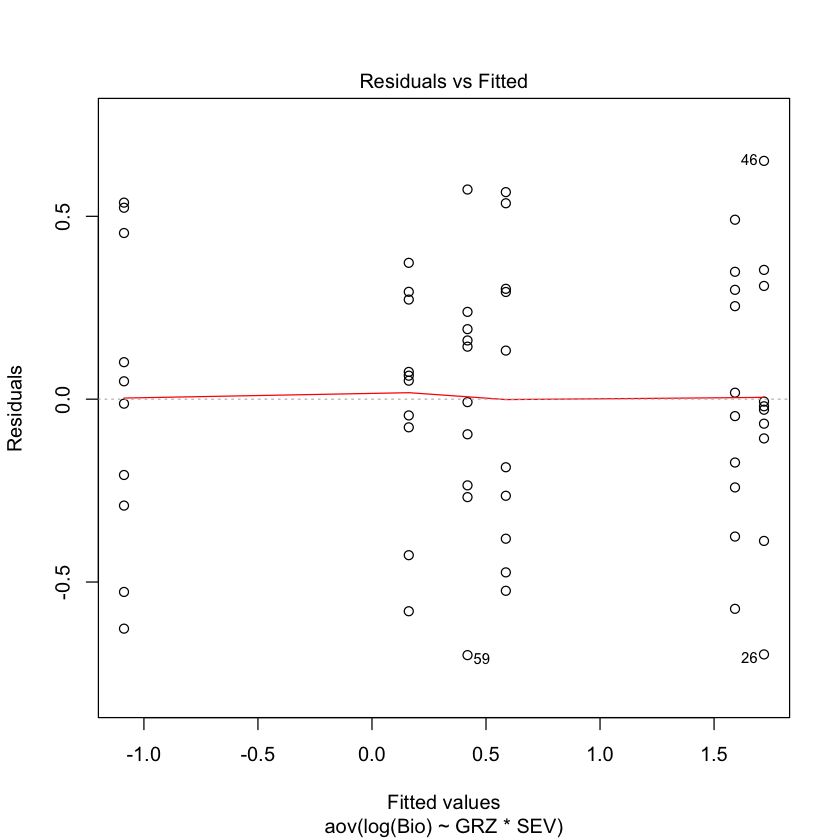

hat values (leverages) are all = 0.1
 and there are no factor predictors; no plot no. 5


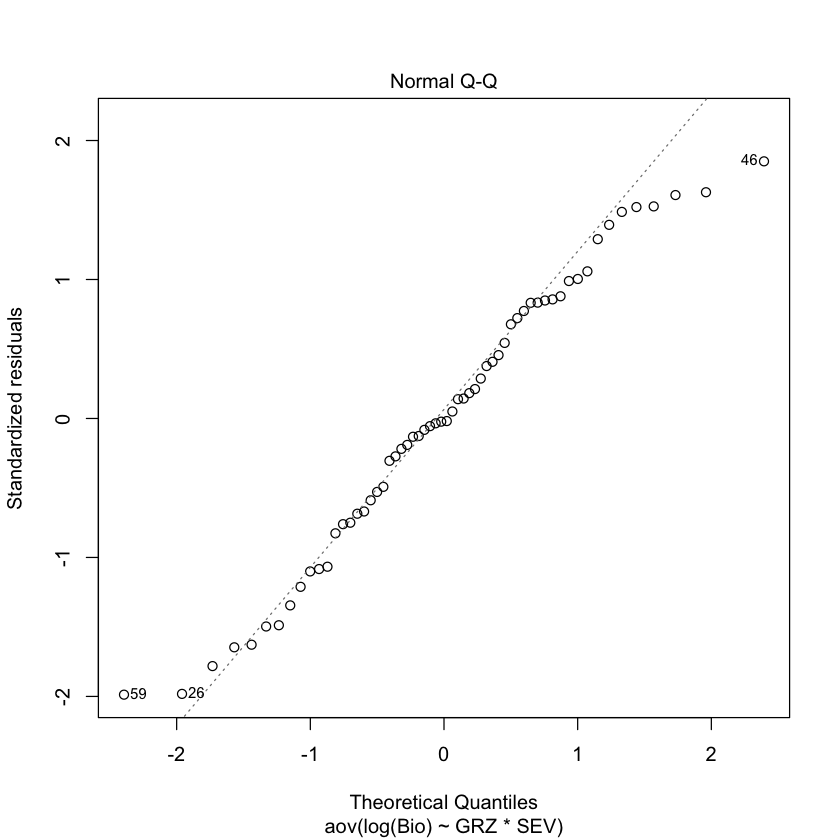

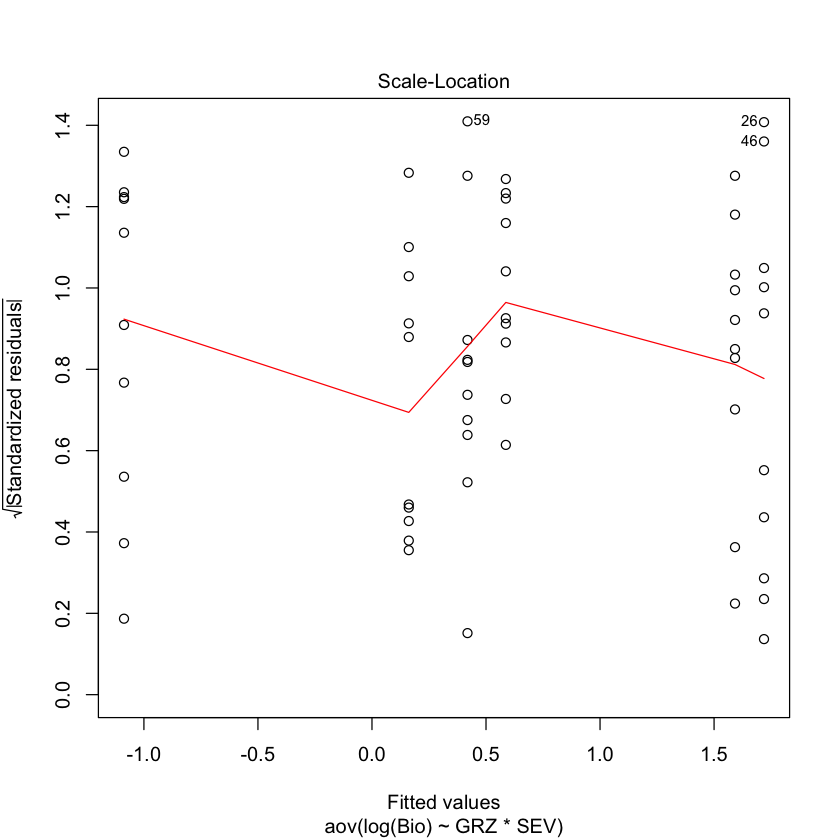

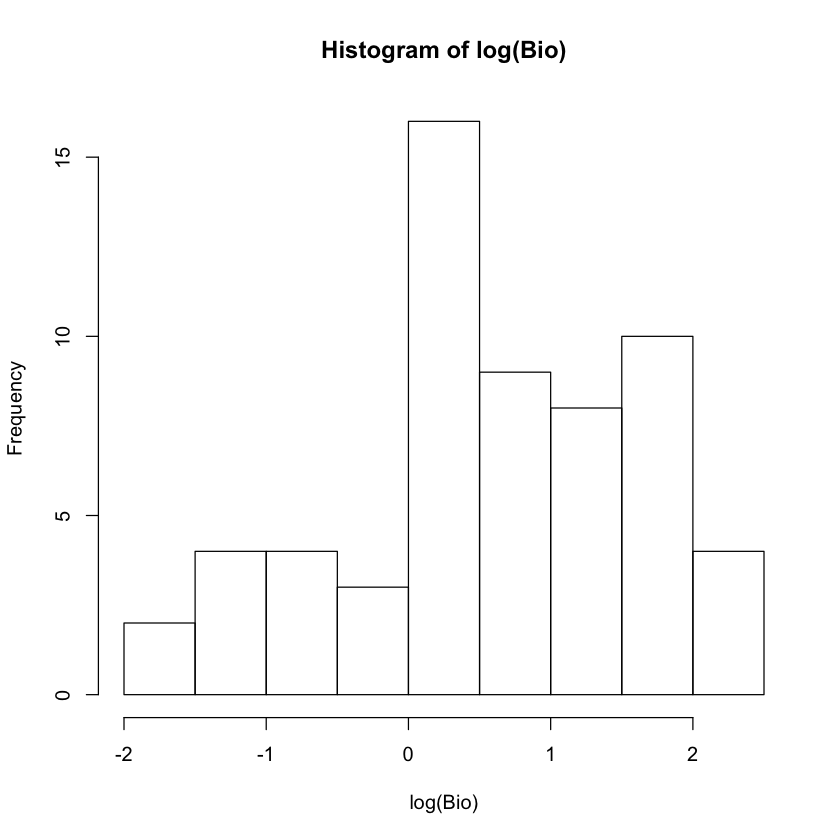

In [10]:
# Two way anova on Bio with Sev and Grz interaction
plant.logaov = aov(log(Bio) ~ GRZ*SEV)
summary(plant.logaov)

### Conclusion: No interaction between the factors

plot(plant.logaov)
hist(log(Bio))

### The log transformation worked. We have normality and homoscedasticity. Also there is an interaction between the factors is significant as well as the main effects

In [13]:
unique(SEV)
unique(GRZ)

[1] "S" "I"

[1] "N" "L" "H"

### a = grz group effect, b = sev group effect

$ H_0: a_1 = a_2 = a_3 = 0$
<br>
$H_a$: At least one of $a_i \ne 0$

$ H_0: b_1 = b_2 = 0$
<br>
$H_a$: At least one of $b_j \ne 0$

$ H_0: a_ib_j = 0$ for all i, j
<br>
$H_a$: At least one of $a_ib_j \ne 0$

In [21]:
library(lsmeans)
plants.logcomp = lsmeans(plant.logaov, pairwise~GRZ:SEV, adjust="tukey")
plants.logcomp

$lsmeans
 GRZ SEV     lsmean        SE df    lower.CL   upper.CL
 H   I    0.1613469 0.1173921 54 -0.07401008  0.3967040
 L   I    0.5869585 0.1173921 54  0.35160149  0.8223155
 N   I    1.7189276 0.1173921 54  1.48357054  1.9542846
 H   S   -1.0873231 0.1173921 54 -1.32268016 -0.8519661
 L   S    0.4188568 0.1173921 54  0.18349980  0.6542139
 N   S    1.5917645 0.1173921 54  1.35640751  1.8271216

Results are given on the log (not the response) scale. 
Confidence level used: 0.95 

$contrasts
 contrast    estimate        SE df t.ratio p.value
 H,I - L,I -0.4256116 0.1660175 54  -2.564  0.1243
 H,I - N,I -1.5575806 0.1660175 54  -9.382  <.0001
 H,I - H,S  1.2486701 0.1660175 54   7.521  <.0001
 H,I - L,S -0.2575099 0.1660175 54  -1.551  0.6334
 H,I - N,S -1.4304176 0.1660175 54  -8.616  <.0001
 L,I - N,I -1.1319691 0.1660175 54  -6.818  <.0001
 L,I - H,S  1.6742817 0.1660175 54  10.085  <.0001
 L,I - L,S  0.1681017 0.1660175 54   1.013  0.9118
 L,I - N,S -1.0048060 0.1660175 54  -6.052